# EDA

This notebook contains all the exploratory work done for the project. Its main results and insights are presenten in the final report under the *Analysis* section.

First, we will do a thorough exploration of  the dataset. Looking into each feature –specially the categorical ones– and their respective values. Here, our goal will be to understand how the possible values for each feature are distributed, what does an empty or null value represent for each feature and how should we treat it. As a result, we might end up filling in the missing values, removing the samples in conflict or even dropping the feature altogether.

Then, we will try to understand what constitutes an outlier, both at the feature and the sample level. We will also explore the possible correlations between feature, if any. And we will look to acquire a deeper understanding of the dataset and the hidden patters and structure it might contain. 

All these steps will lead us t a curated dataset suitable for the later model.

**<span style="color: red">FIX ME</span>**

## 1. Initialization and Data Loading

First, lets import all the libraries we will use in notebook and define some utility functions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
from itertools import combinations
from scipy.stats import chi2_contingency

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Primt markdown programatically for better visualization.
def printmd(string):
    display(Markdown(string))

# Plots and creates labels for values plotted.
def plot_and_annotate(data, **kwarg):
    ax = data['percent'].sort_values().plot(kind='barh', **kwarg)
    for p in ax.patches:
        width = p.get_width()
        plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')
        

#Creates percentages for value_counts of a pd.series object.
def create_count_percentages(series, name=None):
    values = series.value_counts()
    expanded_value = values.to_frame(name)
    expanded_value['percent'] = values.apply(lambda _: _ / series.size * 100)
    return expanded_value
        
crash_data = pd.read_csv('Crash_Analysis_System_CAS_data.csv')

#Data must be loaded before definin create_plot_data due to inside reference.        
def create_plot_data(feature):
    return create_count_percentages(crash_data[feature], name=feature)

In [3]:
print('The dataset has {:3,d} samples and {} features'.format(*crash_data.shape))

The dataset has 655,697 samples and 89 features


## 2 Removal of Non Relevant Features

Our dataset is quite big, but still manageable without any parallelization. It contains 655,697 samples. Each with 89 features, including the target one for the model. However, not all these features will be useful or relevant towards our goal. the file *Crash_Analysis_System_CAS_data.pdf* –available in the root of the project's repository– contains a description of each feature and is provided by the New Zealand Transport Agency. By reading it we are able to identifiy some features that we can disregard from the outset. You are encouraged to do a quick read of the document to better understand all the features in the dataset.

The following features will be removed. Either because they aren't relevant to our proble or because they are derived from other features making them redundant. For each feature, we specify the corresponding reason:

* **_crashYear_** and **_crashFinancialYear_**: Although these features could be of value for a historical analysis and for data exploration, it's not relevant to the final model. We want the model to be able to analyze and predict the severity of a crash regardless of when it happenes. We should also bare in mind the use case for the model. If its purpose is to be  a tool for emergency agencies towards a quicker and better response, the feature vector that the model receives would correspond to crashes that have just happened. Following this logic, the year of the crash is irrelevant.
* **_tlaID_**: this is the ID of the *Territorial Local Authority*. Since we will use the feature *tlaName* for a better understanding of the data, we will disregard this one as it becomes redundant.
* **_areaUnitID_**: by reading the definition of this feature, it’s not clear enough what it represents or how it might be relevant towards our goal. Therefore, we will also disregard it in the name of data sanity.
* **_meshblockID_**, **_easting_**, **_northing_**, **_crashRSRP_**, **_crashDirectionDescription_**, **_crashDistance_**, **_crashRPDescription_**, **_crashRPNewsDescription_** **__crashRPDirectionDescription__** **_outdatedLocationDescription_**: although each of these features have value for different purposes, they correspond mainly to reference data used by the NZ Transport Agency for reporting and other administrative purposes. But they do not correspond to data from the crash itself.
* **_X_**, **_Y_**, **_OBJECTID_**: although these features are useful to uniquely identify a crash and we will use it in a Tableau workbook (more on this below), they are not of much use when it comes to the final model.

In [4]:
drop = ['crashYear', 'crashFinancialYear', 'tlaID', 'areaUnitID', 'meshblockID',
        'easting', 'northing', 'crashRSRP', 'crashDirectionDescription','crashDistance',
        'crashRPDescription', 'crashRPNewsDescription', 'crashRPDirectionDescription', 'outdatedLocationDescription',
       'X', 'Y', 'OBJECTID']
crash_data.drop(drop, axis=1, inplace=True)

## 3 Data Sanitization & Feature Distribution

First, we will start by filling al missing values with the placeholder `###`. As we explore each feature individually, we might decide to leave it as it is to represent a missing values. We could also decide to infer a more suitable value by considering the meaning and relevance of the feature. Or we could also decide to remove samples that have such a value as they could represent inconsistent values from the feature's definition.

In [5]:
crash_data.fillna('###', inplace=True)

### 3.1 Categorical Features

#### crashSeverity

This is our target feature. So we'll start with it.

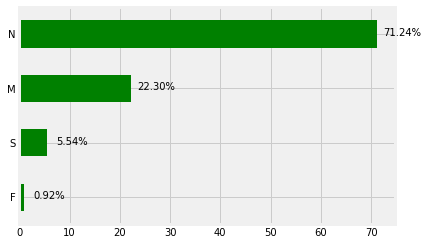

In [6]:
plot_data = create_plot_data('crashSeverity')
plot_and_annotate(plot_data, color='green')

The first thing that we notice is the astonishing small number of fatal crashes there has been; considering this is data going back to the year 2000. We should also mention that New Zealand has had a consistent policy with regard to transportation and road safety.

Also, it is important to note here –as the NZ Transport Agency warns– that the reporting of crashes increses with their severity. Meaning that all *fatal* crashes have been most likely be reported, but that there will be *Non Injury* and *Minor* crashes that weren't reported. This decision falls somewhat to the person in charge of responding to the crash.

However, the most important thing to notice is how these classes are distributed and the imbalance between them. Since we want to predict these classes, and because the dispatched response would be very different depending on our prediction, we definitely need to be very carefull about how we measure the performance of our model.

To this end, and considering we will be trying different algorithms, we will rely on an array of performance metrics that will help us evaluate and chose the best algorithm for the task. Namely, for each algorithm, we will analyze the following performance metrics:
* Accuracy
* Precision
* Recall
* F-Score
* Specificity
* AUC ROC

Each of these metrics will provide valuable insight into the performance of each algorithm and the aspects each one prioritizes.

Finally, due to the unbalanced nature of these classes, we will explore a few techniques to remedy the situation. <span style="color: red">CHECK FOR UNDERSAMPLING N</span>

#### multiVehicle

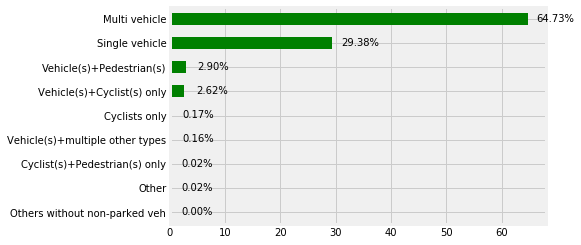

In [7]:
plot_data = create_plot_data('multiVehicle')
plot_and_annotate(plot_data, color='green')

This feature doesn't raise any alarm or suspitions with regard to its values. But we do take notice of its distribution.

#### holiday

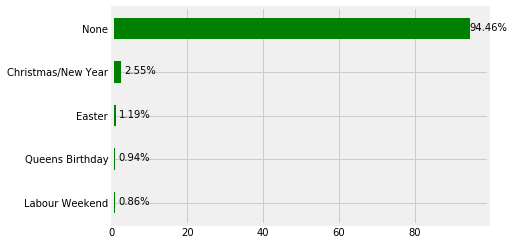

In [8]:
plot_data = create_plot_data('holiday')
plot_and_annotate(plot_data, color='green')

Here we see something interesting. A quick search on the web will show that New Zealanders have a considerable level of alcohol consumption. Yet we see that almost all crashes happened on a regular day; as oposed to some holiday –when alcohol consumption levels areusually  higher.

besides from this observation, the feature doesn't present any abnormalities.

#### regionDesc

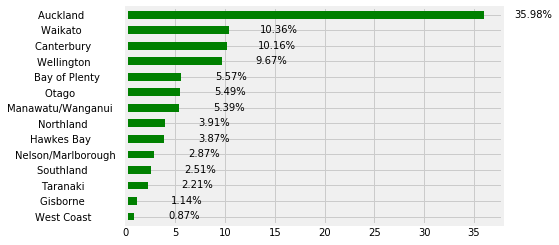

In [9]:
plot_data = create_plot_data('regionDesc')
plot_and_annotate(plot_data, color='green')

This features shows fair consistency with population density throughout the country. It will be interesting to see how the other feature behave with regard to this one.

#### tlaName

As the catalog describes, this feature indicates the local authority that oversaw the crash and the following procedures. Therefore, for almost every case, the tlaName will be a district withing the region of the crash.

However, for some cases, the tlaName will be a distrcit that doesn't belong to the region indicated for the crash. We understand that these cases correspond to crashes that happened close to the border between two regions and for some unknown reason, the TLA that responded to the crash was from another region from where the crash happened. We will consider this as of no consequence.

#### intersection

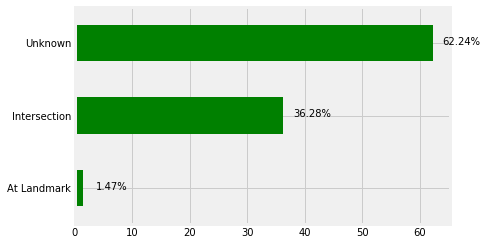

In [10]:
plot_data = create_plot_data('intersection')
plot_and_annotate(plot_data, color='green')

This feature doesn't present anything strange or special. One could argue though that the value *Unknown* deserves some special treatment. However, the NZ Transport Agency has defined it in the PDF as a proper value, giving it complete legitamecy.

#### junctionType

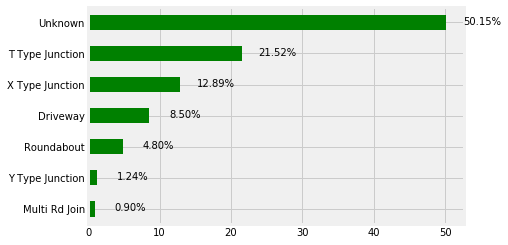

In [11]:
plot_data = create_plot_data('junctionType')
plot_and_annotate(plot_data, color='green')

Again, as with *intersection*, the value *Unknown* is completely legitimate. Moreover, these two fetures are used in tandem to define a derived feature *intersectionMidblock*; so we musn't meddle with them.

#### cornerRoadSideRoad

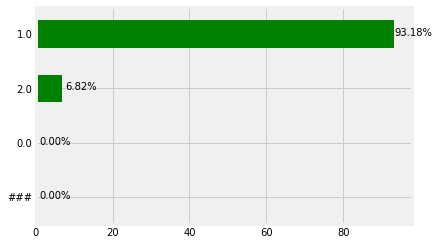

In [12]:
plot_data = create_plot_data('cornerRoadSideRoad')
plot_and_annotate(plot_data, color='green')

Here we finally see something that required our attention. First, let us clarify that the name of this feature in the dataset corresponds to the feature refered to as Crash *Road Side Road (CR_RD_SIDE_RD)* from the PDF. In the PDF, it says that the possible values are either `1`or `2`. But here we find that there are some samples with values `0` –which comes directly from the dataset– and with `###` –which was our way to denote missing values. In any case, the dataset has samples that contain values that are not included in the feature's definition. So we need to consider if we should take any action.

By looking at the plot above, we see that these two strange values occur on a very small number of samples, but lets see on how many exactly:

In [13]:
plot_data

,cornerRoadSideRoad,percent
1.0,610996,93.182674
2.0,44696,6.816563
0.0,3,0.000458
###,2,0.000305


Ok, so we only have five anomalous samples. three for the value `0` and two that were missing values originally.

One option would be to remove these five samples from the dataset. Another options would be to fill these cases with an appropriate value. However, we have no criteria to choose such a value. Besides these few cases only represent an infinitesimal portion of the dataset.

As a final check before removing them, let us see what is the creash severity for these cases.

In [14]:
mask = crash_data[crash_data['cornerRoadSideRoad'].isin([0, '###'])]
mask[['cornerRoadSideRoad', 'crashSeverity']]

,cornerRoadSideRoad,crashSeverity
21021,0,N
26595,0,N
547028,###,N
583837,###,N
630452,0,N


Great. They all correspond to *non-injury* cases. Since this is the class that has the most cases and is responsable for most of the unbalance between classes, we can go ahead and remove them without any significant loss of information.

In [15]:
crash_data.drop(mask.index, inplace=True)

#### directionRoleDescription

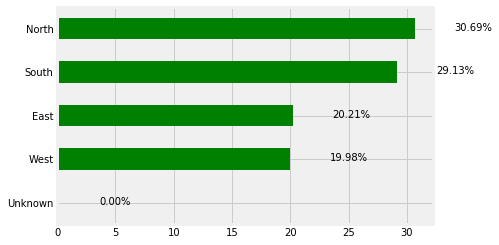

In [16]:
plot_data = create_plot_data('directionRoleDescription')
plot_and_annotate(plot_data, color='green')

Once again, wee see a value that is not mentioned in the feature's definition: `Unknown`. Also, like before, this value occurs on a very small number of samples. So we repeat the same procedure we followed for the previous feature.

Lets see precisely how many samples are there for this value:

In [17]:
plot_data

,directionRoleDescription,percent
North,201212,30.686969
South,190989,29.127853
East,132506,20.208574
West,130979,19.975690
Unknown,6,0.000915


Ok, only 6 cases. Lets check the crash severity for these cases.

In [18]:
mask = crash_data[crash_data['directionRoleDescription'] == 'Unknown']
mask[['directionRoleDescription', 'crashSeverity']]

,directionRoleDescription,crashSeverity
8023,Unknown,M
12792,Unknown,M
27911,Unknown,N
34749,Unknown,N
38166,Unknown,N
67192,Unknown,N


In this case, the samples are split between *non-injury* and *Minor* crashes. Which are the two classes with the most samples. So again, we can go ahead and remove them.

In [19]:
crash_data.drop(mask.index, inplace=True)

#### crashSHDescription

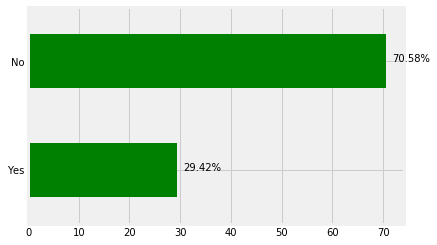

In [20]:
plot_data = create_plot_data('crashSHDescription')
plot_and_annotate(plot_data, color='green')

This feature doesn't present any strange behaviour. So we move along.

#### crashRPSH

This feature has so many possible values that plotting them leaves the plot unreadable. Instead, we show the number on samples for each possible value.

In [21]:
plot_data = create_plot_data('crashRPSH')
plot_data

,crashRPSH,percent
0.0,468584,71.464695
###,79452,12.117385
2.0,20114,3.067627
3.0,11243,1.714693
6.0,9721,1.482569
16.0,7908,1.206065
5.0,4017,0.612641
20.0,2864,0.436794
73.0,2760,0.420933
30.0,2598,0.396226


The first thing to notice here, is that 71.5% of all samples have a value of `0`, followed by another 12% that have a value of `### `. Together, these two values account for 83% of the dataset. If we expect to get any value from this feature, we will need to treat these two values.

In doing so, lets remember that this feture is intended to indicate the State Highway where the crash happened; that is for,  crashes that happened on a SH of course. So it wouldn't make sense to see anything different than our missing value `###` or the `0` from above for samples with *crashSHDescription*=`No`.

We will first verify this assumption before we focus on samples with *crashSHDescription*=`Yes`.

In [22]:
sh_crashes = crash_data[crash_data['crashSHDescription'] == 'No']
sh_crash_values = create_count_percentages(sh_crashes['crashRPSH'])
sh_crash_values

,crashRPSH,percent
0.0,461987,99.834900
###,276,0.059643
2.0,88,0.019017
3.0,70,0.015127
74.0,35,0.007563
6.0,31,0.006699
18.0,29,0.006267
16.0,27,0.005835
73.0,24,0.005186
29.0,23,0.004970


Excellent, 99.88% of samples with *crashSHDescription*=`No` have *crashRPSH* equal to `###`or `0`.

We will infer that the samples that do have a specific SH value correspond to the nearest SH from the site of the crash. In any case, we will set a value of `N/A` for all sample that have *crashSHDescription*=`NO`, as we want it to carry no relevance for those cases.

In [23]:
crash_data['crashRPSH'] = crash_data.apply(
    lambda row: 'N/A' if row['crashSHDescription'] == 'No' else row['crashRPSH'],
    axis=1)

With that case covered, lets focus now on crashes that did happen on an SH

In [24]:
sh_crashes = crash_data[crash_data['crashSHDescription'] == 'Yes']
sh_crash_values = create_count_percentages(sh_crashes['crashRPSH'])
sh_crash_values

,crashRPSH,percent
###,79176,41.037655
2.0,20026,10.379662
3.0,11173,5.791070
6.0,9690,5.022417
16.0,7881,4.084795
0.0,6597,3.419286
5.0,4003,2.074792
20.0,2862,1.483401
73.0,2736,1.418094
30.0,2593,1.343976


Ok, 41% of crashes that happened on an SH don't say on which one. So lets see if we can shed some light on this cases and infer their missing values by looking at `crashLocation1`:

In [25]:
na_samples = sh_crashes[sh_crashes['crashRPSH'] == '###']
na_samples_values = create_count_percentages(na_samples['crashLocation1'])
na_samples_values

,crashLocation1,percent
SH 1N,52737,66.607305
SH 1S,16953,21.411791
SH 6A,610,0.770435
SH 30A,547,0.690866
SH 1B,516,0.651713
SH 25A,473,0.597403
SH 50A,428,0.540568
SH 2A,424,0.535516
SH 20A,402,0.507730
SH 1N VIVIAN,222,0.280388


This is great, almost 90% of all `###` crashes actually happened on SH1 (either nort or south). So lets go ahead and insert this value:

In [26]:
crash_data['crashRPSH'] = crash_data.apply(
    lambda row: 1. if row['crashSHDescription'] == 'Yes' and row['crashLocation1'] in ('SH 1N', 'SH 1S') else row['crashRPSH'],
    axis=1
)

Now we need to compute again the series from above to update our picture of the missing values

In [27]:
sh_crashes = crash_data[crash_data['crashSHDescription'] == 'Yes']
sh_crash_values = create_count_percentages(sh_crashes['crashRPSH'])
sh_crash_values

,crashRPSH,percent
1.0,69932,36.246404
2.0,20024,10.378625
3.0,11154,5.781222
6.0,9677,5.015679
###,9486,4.916682
16.0,7881,4.084795
0.0,6517,3.377822
5.0,3988,2.067017
20.0,2862,1.483401
73.0,2735,1.417576


We still have some cases that need our attention. From all crshes with *crashSHDescription*=`Yes`, there are still 4.9% samples with *crashRPSH*=`###` and another 3.4% of samples with *crashRPSH*=`0`.

In fact, lets check if we see any other strange value.

In [28]:
sh_crash_values.index

Index([  1.0,   2.0,   3.0,   6.0, '###',  16.0,   0.0,   5.0,  20.0,  73.0,
        30.0,   8.0,  25.0,  29.0,   4.0,  45.0,  35.0,  12.0,  74.0,   7.0,
        26.0,  10.0,  27.0,  60.0,  50.0,  94.0,  57.0,  23.0,  75.0,  58.0,
        14.0,  36.0,  18.0,  54.0,  39.0,  22.0,  11.0,  76.0,  87.0,  44.0,
        99.0,  15.0,  33.0,  56.0,  88.0,  77.0,  96.0,  32.0,  79.0,  31.0,
        85.0,  65.0,  93.0,  41.0,  38.0,  24.0,  63.0,  43.0,  67.0,  34.0,
        83.0,  82.0,  47.0,  49.0,  28.0,  90.0,  71.0,  21.0,  53.0,  62.0,
        80.0,  84.0,  69.0,  37.0,  98.0,  97.0,  95.0,  86.0,  17.0,  48.0,
        78.0,  46.0],
      dtype='object')

Good, those are the only two.

Would it be possible to simply drop these samples?

First of all, of how many samples are we talking about?

In [29]:
p = sh_crashes[sh_crashes['crashRPSH'] == '###'].shape[0] / crash_data.shape[0] * 100
printmd('the remaining `###` samples represent {:.2f}% of the whole dataset'.format(p))

the remaining `###` samples represent 1.45% of the whole dataset

In [30]:
p = sh_crashes[sh_crashes['crashRPSH'] == 0].shape[0] / crash_data.shape[0] * 100
printmd('the remaining `0` samples represent {:.2f}% of the whole dataset'.format(p))

the remaining `0` samples represent 0.99% of the whole dataset

If we want to remove these samples, we should first check if this action would affect the balance and distribution of our target featrure: `crashSeveriry`:

In [31]:
def compute_percent_total(row):
    return row['crashSeverity'] / crash_data[crash_data['crashSeverity'] == row.name].shape[0] * 100

In [32]:
counts = create_count_percentages(sh_crashes[sh_crashes['crashRPSH'] == '###']['crashSeverity'])
counts['percent_total'] = counts.apply(compute_percent_total, axis=1)
counts

,crashSeverity,percent,percent_total
N,6953,73.297491,1.488451
M,2015,21.241830,1.378315
S,445,4.691124,1.224883
F,73,0.769555,1.210012


In [33]:
counts = create_count_percentages(sh_crashes[sh_crashes['crashRPSH'] == 0]['crashSeverity'])
counts['percent_total'] = counts.apply(compute_percent_total, axis=1)
counts

,crashSeverity,percent,percent_total
N,5325,81.709375,1.139940
M,1031,15.820163,0.705232
S,147,2.255639,0.404624
F,14,0.214823,0.232057


This is very good news. For both cases – that is, `###` and `0`– the remaining samples are equally distributed across our target feature. Notice how, for each *crashSeverity* value, the remaining `###` samples represent between 1,2% and 1.5% of each class; and between 0.2% and 1.1%, respectively.

Moreover, these values are also sortes the same way the target classes are. This allows us to conlcude that dropping these remaining samples from the dataset will not alter the balance of classes of the target feature. We could call it a stratified trimming of the dataset.

In [34]:
mask = crash_data.loc[(crash_data['crashSHDescription'] == 'Yes') & (crash_data['crashRPSH'].isin([0, '###']))]
crash_data.drop(mask.index, inplace=True)

phew!

We have treated all strange and missing values by analyzing the relevant samples and their corresponding context. Now, the feature can be used in the final model... *CrashRPSH*: Done!

#### intersectionMidblock

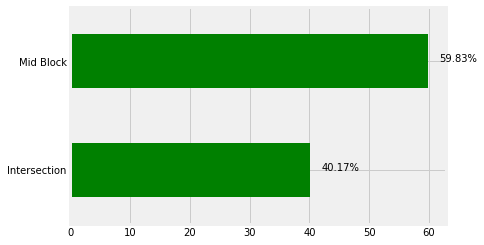

In [35]:
plot_data = create_plot_data('intersectionMidblock')
plot_and_annotate(plot_data, color='green')

Nothing strange. Moving on.

#### flatHill

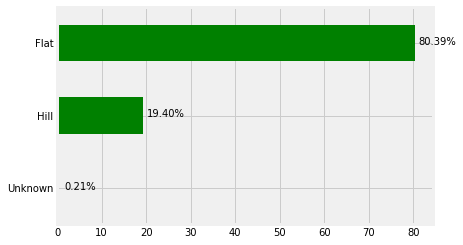

In [36]:
plot_data = create_plot_data('flatHill')
plot_and_annotate(plot_data, color='green')

Ok. How many sample are there with a value `Unknown`?

In [37]:
plot_data

,flatHill,percent
Flat,514254,80.392007
Hill,124089,19.398515
Unknown,1340,0.209479


What are the incidence of these samples across the target feature?

In [38]:
unknowns = crash_data[crash_data['flatHill'] == 'Unknown']
create_count_percentages(unknowns['crashSeverity'])

,crashSeverity,percent
N,1029,76.791045
M,239,17.835821
S,66,4.925373
F,6,0.447761


Again, the inconsistent samples are distributed across the target variable in such a way that removing them from the dataset wouldn't alter the balance of the classes we intend to predict. Lets go on and remove then.

In [39]:
crash_data.drop(unknowns.index, inplace=True)

#### roadCharacter

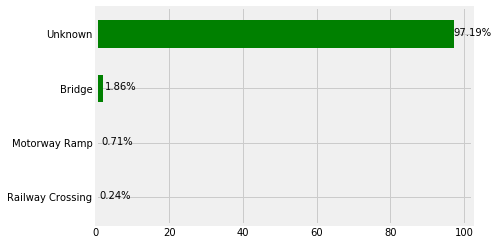

In [40]:
plot_data = create_plot_data('roadCharacter')
plot_and_annotate(plot_data, color='green')

In this case, `Unknown` is a legitiamte value. So there's nothing to worry about this features.

#### roadCurvature

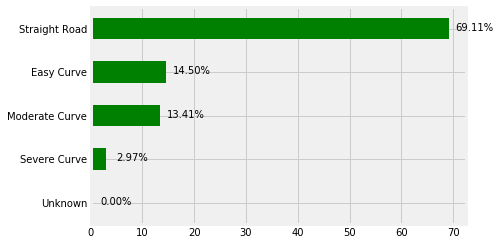

In [41]:
plot_data = create_plot_data('roadCurvature')
plot_and_annotate(plot_data, color='green')

Lets repeat the process as for *flatHill*:
* Check how many samples are there with a value `Unknown` .
* Check for the severity of those crashes.
* If possible, remove the samples altogether.

In [42]:
plot_data

,roadCurvature,percent
Straight Road,441180,69.113314
Easy Curve,92575,14.502391
Moderate Curve,85613,13.411755
Severe Curve,18973,2.972227
Unknown,2,0.000313


In [43]:
unknowns = crash_data[crash_data['roadCurvature'] == 'Unknown']
create_count_percentages(unknowns['crashSeverity'])

,crashSeverity,percent
N,2,100.0


In [44]:
crash_data.drop(unknowns.index, inplace=True)

#### roadLane

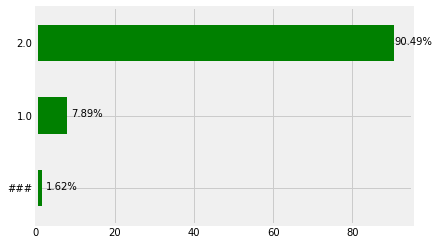

In [45]:
plot_data = create_plot_data('roadLane')
plot_and_annotate(plot_data, color='green')

At this point, we have kind of a recipe to deal with these inconsistent values. At least until we cannot remove the samples. Until then, repeat:

In [46]:
plot_data

,roadLane,percent
2.0,577631,90.489409
1.0,50391,7.894057
###,10319,1.616534


In [47]:
missing = crash_data[crash_data['roadLane'] == '###']
create_count_percentages(missing['crashSeverity'])

,crashSeverity,percent
N,7822,75.801919
M,1747,16.929935
S,672,6.512259
F,78,0.755887


In [48]:
crash_data.drop(missing.index, inplace=True)

At this point, we should mention that a more thorugh analysis of the dataset could allow us to fill in the blanks of all this missing values and avoid dropping their samples. However due to a time constraint, and to keep our focus on building the model, we have decided to take this route.

#### roadMarkings

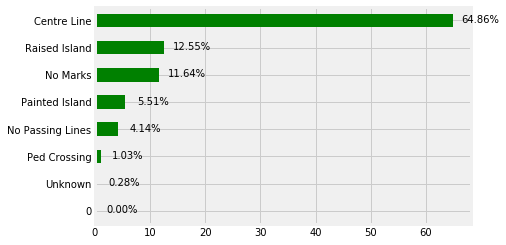

In [49]:
plot_data = create_plot_data('roadMarkings')
plot_and_annotate(plot_data, color='green')

In [50]:
plot_data

,roadMarkings,percent
Centre Line,407305,64.855212
Raised Island,78812,12.549242
No Marks,73127,11.644019
Painted Island,34579,5.506017
No Passing Lines,25977,4.136320
Ped Crossing,6477,1.031333
Unknown,1744,0.277697
0,1,0.000159


In [51]:
zero = crash_data[crash_data['roadMarkings'] == '0']
create_count_percentages(zero['crashSeverity'])

,crashSeverity,percent
N,1,100.0


In [52]:
crash_data.drop(zero.index, inplace=True)

#### roadSurface

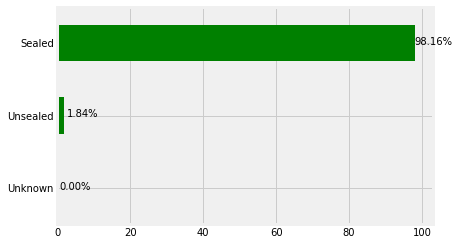

In [53]:
plot_data = create_plot_data('roadSurface')
plot_and_annotate(plot_data, color='green')

In [54]:
plot_data

,roadSurface,percent
Sealed,616468,98.160412
Unsealed,11552,1.839429
Unknown,1,0.000159


In [55]:
unknowns = crash_data[crash_data['roadSurface'] == 'Unknown']
create_count_percentages(unknowns['crashSeverity'])

,crashSeverity,percent
N,1,100.0


In [56]:
crash_data.drop(unknowns.index, inplace=True)

#### roadWet

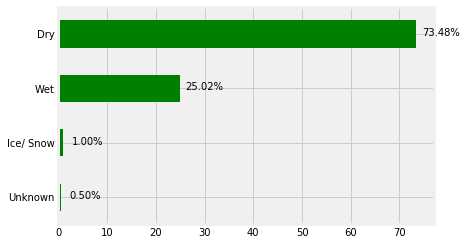

In [57]:
plot_data = create_plot_data('roadWet')
plot_and_annotate(plot_data, color='green')

`Unknown` is admissible. Moving along.

#### numberOfLanes

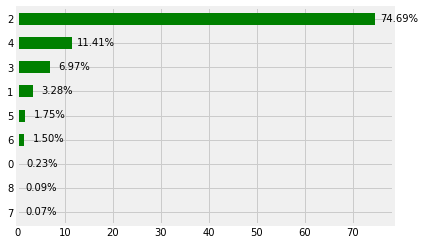

In [58]:
plot_data = create_plot_data('numberOfLanes')
plot_and_annotate(plot_data, color='green')

Hm... here the only strange values would be `0`. How can a road, street or highway have zero lanes?

In [59]:
plot_data

,numberOfLanes,percent
2,469081,74.692048
4,71681,11.413808
3,43768,6.969205
1,20605,3.280946
5,11004,1.752173
6,9423,1.500430
0,1434,0.228337
8,577,0.091876
7,447,0.071176


In [60]:
zeros = crash_data[crash_data['numberOfLanes'] == 0]
create_count_percentages(zeros['crashSeverity'])

,crashSeverity,percent
N,1044,72.803347
M,297,20.711297
S,86,5.997211
F,7,0.488145


In [61]:
crash_data.drop(zeros.index, inplace=True)

#### trafficControl

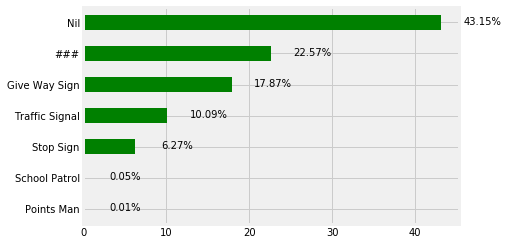

In [62]:
plot_data = create_plot_data('trafficControl')
plot_and_annotate(plot_data, color='green')

For this particular feature, we should mention that the value `Nil` is very important. Tn indicated that place where the crash happened didn't have any traffic control signals. This could turn out to be a significat factor for the crash severity and it could be an *easy* way to reduce fatalities and crashes overall. However, a sample with no value for this feature is problematic.

Lets check the severity of crashes without a value for it:

In [63]:
missing = crash_data[crash_data['trafficControl'] == '###']
create_count_percentages(missing['crashSeverity'])

,crashSeverity,percent
N,95805,67.754597
M,33531,23.713579
S,10603,7.498586
F,1461,1.033239


In this case we cannot simply remove the samples. What's more we don't have straight way of compensating or ifering a value for these samples. Therefore, we will assign a value on `N/A` for this samples and let the final model account for it.

<u>**Note:**</u> It is important to say that were it not for the time contraint mentioned earlier, we should dig deeper into this feture in order to arrive at a better solution since the feature carries much value towards our goal.

In [64]:
crash_data['trafficControl'] = crash_data.apply(
    lambda row: 'N/A' if row['crashSHDescription'] == 'No' else row['trafficControl'],
    axis=1)

#### urban

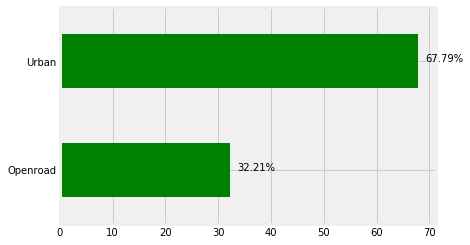

In [65]:
plot_data = create_plot_data('urban')
plot_and_annotate(plot_data, color='green')

Nothing out of the ordinary, moving to the next one

#### darkLight

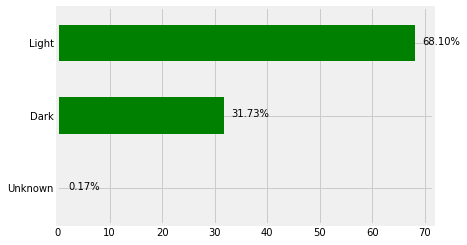

In [66]:
plot_data = create_plot_data('darkLight')
plot_and_annotate(plot_data, color='green')

Still looking good

#### Light

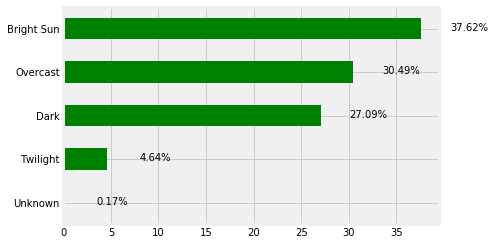

In [67]:
plot_data = create_plot_data('light')
plot_and_annotate(plot_data, color='green')

Three in a row.

#### streetLight

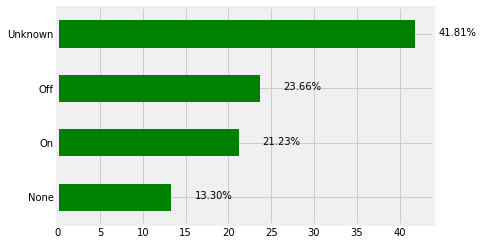

In [68]:
plot_data = create_plot_data('streetLight')
plot_and_annotate(plot_data, color='green')

Although this feautre doesn't present any inconsistent values with its definition, the high number of crashes with `Unknown` does raise questions.

We will continue now, but keep this detail in mind.

#### weatherA

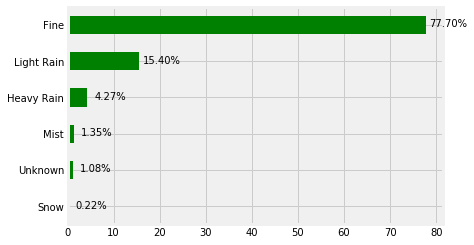

In [69]:
plot_data = create_plot_data('weatherA')
plot_and_annotate(plot_data, color='green')

All good

#### weatherB

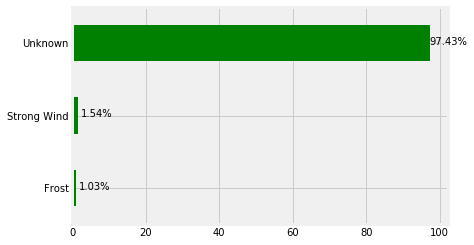

In [70]:
plot_data = create_plot_data('weatherB')
plot_and_annotate(plot_data, color='green')

All good

---

After reviewing all the categorical features, our dataset has changed a bit:

In [71]:
print('The dataset has {:3,d} samples and {} features'.format(*crash_data.shape))

The dataset has 626,586 samples and 72 features


We have dropped 4.6% of the samples due to inconsistent values and we have dropped 11 features that weren't meaning ful. The next step is to check a few numerical features.

### 3.2 Numerical Feature

We won't be checking all numerical features, many of them are just counters for number of different kind of object that were hit in the crash. But there are a few that we should check at least.

#### speedLimit

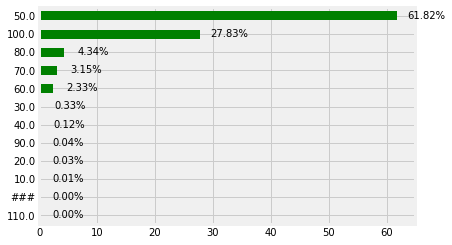

In [72]:
plot_data = create_plot_data('speedLimit')
plot_and_annotate(plot_data, color='green')

This looks nice. Excep for the very few cases that are missing a value. Since they are so few, we will assign a value of -1 to these samples –in order for the feature's data type to be consistent–  and let the final model account for them.

In [73]:
crash_data['speedLimit'] = crash_data.apply(
    lambda row: -1 if row['speedLimit'] == '###' else row['speedLimit'],
    axis=1
)

#### advisorySpeed

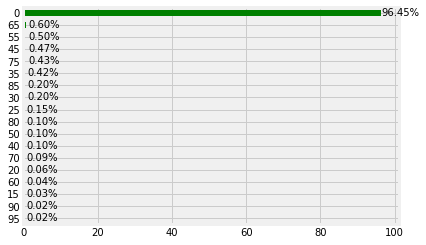

In [74]:
plot_data = create_plot_data('advisorySpeed')
plot_and_annotate(plot_data, color='green')

Here we clearly see that this features is being used properly; as it makes no sense to advise a speed of `0` (Mk/Hr) on 96% of cases.

So we will simply drop the feature from the dataset.

In [75]:
crash_data.drop('advisorySpeed', axis=1, inplace=True)

#### temporarySpeedLimit

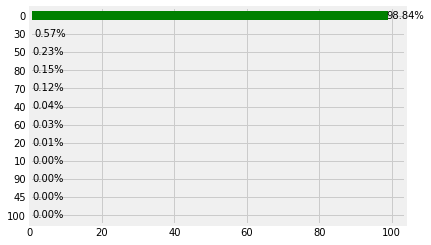

In [76]:
plot_data = create_plot_data('temporarySpeedLimit')
plot_and_annotate(plot_data, color='green')

Same thing as before. We remove the feature from the dataset.

In [77]:
crash_data.drop('temporarySpeedLimit', axis=1, inplace=True)

---

As we can see, althoguh the last three features are numerical, they actualy could be intepreted as categorical (ordinal) features. In fact, that's what we will do

Great. We have removed two more features, but we haven't dropped any further samples.

This concludes our cleaning tasks and we can now start exploring the structure of the dataset and the relation between the features. But before we do that, lets save the clean dataset so we don't have to go through all this process again when feeding it to the model. This will help reduce training time and could also add to the accuracy and efficiency of the model.

Also, from this point forward, we will use a feature catalog, which is a distilled version of the PDF from above. The catalog will be useful to keep track of all the features, their meaning and type, and the data type of their values. we will use it as a reference throughout the project and it will be useful should you have any question about the dataset.

The catalog is a tab-separated file named *features_description.tsv*. You ca find in the root of the project's repository.

In [3]:
def parse_type(dtype):
    if dtype == 'int':
        return np.int8
    elif dtype == 'float':
        return np.float
    else:
        return dtype

# Read features descriptions
features_catalog = pd.read_table('features_description.tsv')
# Make a dict to use as dtypes for panda's dataframe
features_dtypes = features_catalog.set_index('feature_name')['pandas_dtype'].apply(parse_type).to_dict()
# Keep only the columns that remain in the clean version of the dataframe
features_dtypes = {k: v for k, v in features_dtypes.items() if k in crash_data.columns}

In [22]:
crash_data.astype(features_dtypes, copy=False, inplace=True)

ValueError: Cannot convert non-finite values (NA or inf) to integer

As a final step, we wil remove **_crashLocation1_**, **_crashLocation2_**. These features present such a varied array of values which are subject to the point of view of the officer that reported each crash that we simply cannot use them for our analysis or model

In [80]:
crash_data.drop(['crashLocation1', 'crashLocation2'], axis=1, inplace=True)

In [81]:
crash_data.to_csv('Crash_Analysis_System_CAS_data_clean.csv', index=False)

## 4. Correlation of Features

In this section we will explore the relation between features. Specifically, we present a Chi2 test of independence for each pair of categorical features (excluding the numerical ones).

In [4]:
crash_data_clean = pd.read_csv('Crash_Analysis_System_CAS_data_clean.csv',
                               dtype=features_dtypes,
                               keep_default_na=False)

In [84]:
from scipy.stats import chi2_contingency

available_features = [feature for feature in features_catalog['feature_name'] if feature in crash_data_clean.columns]

chi2_matrix = []
index = []

for feature_a in available_features:
    index.append(feature_a)
    row = []
    for feature_b in available_features:
        contingency = pd.crosstab(crash_data_clean[feature_a],
                                  crash_data_clean[feature_b])
        #acceptance level is 0.05
        p = chi2_contingency(contingency)[1]
        row.append(p)
    chi2_matrix.append(row)

Next are the P value corresponding to the test for each pair of features. Naturally, every element in the diagonal will have a value of 0 since any given features will be totally dependent on itself.

The values should be interpreted as the probability that a Chi2 test for the complete population of crashes be greater than the one found using the (sample) dataset. In other words, how likely is it to find values different than the ones found using the provided crash samples?

If ther value is greated than a given treashold –in this case 0.05, or 5%– then the two features will be deemed as independent. If the P value is lower than 0.05, the two features will be considered as mutually dependant.

For a better visualization of these values we include an image generated from the Tableau workbook available for download. Due to a time contraint, we don't include the necesary code to reproduce the visual using matplotlib.

In [91]:
chi2_p_values

,cornerRoadSideRoad,crashRPSH,crashSeverity,crashSHDescription,darkLight,directionRoleDescription,flatHill,holiday,intersection,intersectionMidblock,...,moped,motorCycle,otherVehicleType,schoolBus,suv,taxi,truck,unknownVehicleType,vanOrUtility,pedestrian
cornerRoadSideRoad,0.000000e+00,0.000000e+00,1.269356e-64,0.000000e+00,2.132818e-74,0.000000e+00,0.000000e+00,9.809611e-02,0.000000e+00,0.000000e+00,...,2.336930e-01,1.131607e-23,8.536614e-08,5.419807e-01,5.152767e-13,5.835624e-04,1.792213e-67,4.987269e-01,1.613292e-46,4.240924e-03
crashRPSH,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.199965e-91,0.000000e+00,0.000000e+00,3.501380e-246,0.000000e+00,0.000000e+00,...,1.070070e-49,4.223572e-284,2.942202e-175,9.943916e-01,3.841805e-130,4.487386e-75,0.000000e+00,1.000000e+00,3.438629e-189,0.000000e+00
crashSeverity,1.269356e-64,0.000000e+00,0.000000e+00,0.000000e+00,1.263091e-175,6.312706e-08,9.175632e-266,2.605378e-24,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.023684e-31,3.457405e-10,3.822733e-27,1.167200e-25,4.878985e-273,7.471039e-01,1.118210e-10,0.000000e+00
crashSHDescription,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.442837e-51,0.000000e+00,5.419877e-96,3.803621e-127,0.000000e+00,0.000000e+00,...,2.768988e-146,3.341325e-22,3.475834e-02,2.355626e-01,1.220247e-135,4.870168e-173,0.000000e+00,6.585585e-01,9.970478e-254,0.000000e+00
darkLight,2.132818e-74,1.199965e-91,1.263091e-175,9.442837e-51,0.000000e+00,1.353868e-08,2.763078e-54,0.000000e+00,1.056962e-126,6.254560e-206,...,1.764000e-11,9.071598e-218,6.684470e-15,5.540209e-28,8.338774e-138,1.411440e-79,0.000000e+00,9.958547e-01,0.000000e+00,2.910203e-56
directionRoleDescription,0.000000e+00,0.000000e+00,6.312706e-08,0.000000e+00,1.353868e-08,0.000000e+00,1.187480e-41,3.666823e-04,0.000000e+00,0.000000e+00,...,2.043286e-03,2.832754e-02,7.890454e-01,3.612102e-01,2.718363e-05,4.442752e-04,1.579516e-47,3.555504e-01,1.500661e-02,7.798183e-17
flatHill,0.000000e+00,0.000000e+00,9.175632e-266,5.419877e-96,2.763078e-54,1.187480e-41,0.000000e+00,2.094839e-40,0.000000e+00,0.000000e+00,...,9.699334e-14,1.442181e-67,3.960461e-01,1.999817e-01,2.300898e-01,1.221065e-06,1.101570e-09,1.852518e-01,1.215570e-09,2.135499e-104
holiday,9.809611e-02,3.501380e-246,2.605378e-24,3.803621e-127,0.000000e+00,3.666823e-04,2.094839e-40,0.000000e+00,4.860076e-46,3.522101e-68,...,3.392887e-04,1.247402e-13,5.688084e-02,1.395679e-02,5.051190e-01,1.896357e-03,1.144786e-192,2.092922e-02,3.782953e-18,7.255404e-15
intersection,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.056962e-126,0.000000e+00,0.000000e+00,4.860076e-46,0.000000e+00,0.000000e+00,...,5.553742e-109,3.918489e-15,4.537207e-29,9.824049e-01,2.780566e-13,3.488656e-54,5.723058e-250,4.042636e-01,2.840668e-34,1.241579e-155
intersectionMidblock,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.254560e-206,0.000000e+00,0.000000e+00,3.522101e-68,0.000000e+00,0.000000e+00,...,8.462826e-110,9.334115e-12,8.119074e-32,8.308599e-01,1.815835e-23,6.052290e-94,9.709531e-174,7.458134e-01,7.078494e-42,1.436592e-15


<img src="Chi2 Test for Independence - P Values.png" />

Next, we present the same view as above buy with a treashold filter in order to be able to quickly identify the indpendent pair of features

In [85]:
chi2_p_values = pd.DataFrame(chi2_matrix, index=index, columns=index)
chi2_p_values.apply(lambda p: p < .001)

,cornerRoadSideRoad,crashRPSH,crashSeverity,crashSHDescription,darkLight,directionRoleDescription,flatHill,holiday,intersection,intersectionMidblock,...,moped,motorCycle,otherVehicleType,schoolBus,suv,taxi,truck,unknownVehicleType,vanOrUtility,pedestrian
cornerRoadSideRoad,True,True,True,True,True,True,True,False,True,True,...,False,True,True,False,True,True,True,False,True,False
crashRPSH,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,True,True,False,True,True
crashSeverity,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
crashSHDescription,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,True,True,False,True,True
darkLight,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
directionRoleDescription,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,True,False,False,True
flatHill,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,True,True,False,True,True
holiday,False,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,True,False,True,True
intersection,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,True,True,False,True,True
intersectionMidblock,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,True,True,False,True,True


<img src="Chi2 Test for Independence - P Values Mask.png" />

As we can see, there is no single feature that is independant from every other features, except for `otherVehicleType` and maybe `animals`. However, the most important detail to note here, is the fact that crashSeverity is dependant on almost every feature.

This means that if we choose to remove any additional feature we would be removing valuable information for our model to use. Aditionally, we need to keep this in mind as we move to our preprocessing step where we will attemp to uncover latent features through different dimentionality reduction techniques. These techniques might be rendered useless due to the high *correlation* between feature. But in this case, such *corraltion* has meaning by itself.

At this point we can start to guess what sort of algorithms might turn out to be a good fit for this problem. Specifically, we will first implement a Naive Bayes Algorithms to be used as a benchmark; then we will try different ensemble methods based on tree classifiers as we suspect they could yield good precision and also recall.

## 5. Exploratory Visualization

We defer the visual exploration of the dataset to a Tableau workbook published Tableau Public and available for download here:

https://public.tableau.com/views/NZCrashAnalysisSystem2000-2018Q2/CrashesperRegion?:embed=y&:display_count=yes

The workbook has some navigation controls that will allow for a deeper exploration of the data.

The workbook offers three dashboards. The first one calles *Crashe per Region* presents the total number of crashes per region.

Interestingly, Waikato has the most fatal crashes, closely followed by auckland and Canterburry.
All other severity levels show similar distribution with Auckland, Waikato, Canterburry and Wellignton concentrating the most cases, in that order.

<img src="Crashes per Region.png" />

The second dashboard marks each crash in a map, colored by its severity and also presents –for each region– the top 5 locations the most number of crashes. The map and the list are linked to offered a more interactive exploration.

<img src="Crash Locations by Region and Severity.png" />

The third dashboard shows the distribution of 8 different feature with regard to Crash Severity. Showing that–for each of these features– the distribution is very similiar across crash Severity levels. This can be visualized by the noting how similiar are the 4 color bars (one for each crash severity level), in each feature's chart. Additionally, there's a region filters that allows to look at a specific region. This filter can be used to also see that all regions behave more or less the same.

<img src="Single Feature Distribution.png" />

These three dashbaord provide a great overview on the behaviour of the dataset. Although we were note able to identify a specific characteristic that could help us understand what drives a given crash severity level; we do notice that there's a common trend both across crash severity levels and regions.

This trend motivates us to explore the data with more powerful techniques. Specifically, our next will be to run some unsupervised algorithms in an attempt to uncover any significant structure underlying the data. But first, we will try to reduce the dimensionality by applying PCA –after applying One Hot Enconding to our categorical features.

---

## 6. Dimensionality Reduction

In [5]:
categorical_features = list(features_catalog[features_catalog['feature_type'] == 'categorical']['feature_name'])
categorical_features.remove('crashSeverity')
crash_data_ohe = pd.get_dummies(crash_data_clean,columns=categorical_features)

In [ ]:
crash_data_ohe.to_csv('Crash_Analysis_System_CAS_data_ohe.csv', index=False)

In [6]:
y = crash_data_ohe['crashSeverity']
X = crash_data_ohe.drop('crashSeverity', axis=1)

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, random_state=42)
reduced = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

In [ ]:
reduced_df = pd.DataFrame(reduced)
reduced_df

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_labels = le.fit_transform(y)

In [ ]:
plt.scatter(reduced_df[0], reduced_df[1], c=[sns.color_palette()[x] for x in y_labels])
plt.gca().set_aspect('equal', 'datalim')

### UMAP

In [ ]:
import umap

embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X.sample(frac=.01))

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in y_labels])
plt.gca().set_aspect('equal', 'datalim')

### Fast ICA

In [ ]:
from sklearn.decomposition import FastICA

fica = FastICA(n_components=3, algorithm='parallel', random_state=42)
X_fica = fica.fit_transform(X)

In [ ]:
plt.scatter(X_fica[:, 2], X_fica[:, 0], c=[sns.color_palette()[x] for x in y_labels])
plt.gca().set_aspect('equal', 'datalim')

### Factor Analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis

fa =FactorAnalysis(n_components=5)
X_fa = fa.fit_transform(X)

In [ ]:
plt.scatter(X_fa[:, 1], X_fa[:, 0], c=[sns.color_palette()[x] for x in y_labels])
plt.gca().set_aspect('equal', 'datalim')

<div style="color:red">
Try<br> Hierarchical clustering: http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering<br>
DBSCA: http://scikit-learn.org/stable/modules/clustering.html#dbscan<br>
GMM: http://scikit-learn.org/stable/modules/mixture.html#mixture
</div>